In [1]:
# Environment Variables
from dotenv import load_dotenv
load_dotenv("../.env");

# System Modules
from pathlib import Path

# General Purpose Libraries 
import torch
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio.v3 as iio

# Paths and Directory Management
from etl.pathfactory import PathFactory
from etl.etl import reset_dir

# Datasets and Datamodules
from data.datamodules import ImageDatasetDataModule 
from data.datasetwrappers import OxfordIIITPetWrapper

# Transforms
import torchvision.transforms.v2 as t

# Models
from torchvision.models import ResNet50_Weights
from torchvision.models.segmentation import fcn_resnet50 

# Tasks
from training.tasks import ClassificationTask

# Loggers
import wandb
from lightning.pytorch.callbacks import ModelCheckpoint
from lightning.pytorch.loggers import WandbLogger, CSVLogger

#Trainers
from lightning import Trainer

# Type Hints
from typing import Callable, Any, Optional 
from numpy.typing import NDArray

#%matplotlib ipympl

In [2]:
LOGS_DIR = Path.cwd() / "logs"
CHECKPOINTS_DIR = LOGS_DIR / "checkpoints"

In [3]:
reset_dir(LOGS_DIR)
reset_dir(CHECKPOINTS_DIR)

In [4]:
experiment = {
    "dataset_name": "oxford-iiit-pet",
    "task": "segmentation",

    "eval_split": "predefined",
    "batch_size": 64,
    "grad_accum": 8,
    "num_workers": 15,

    "num_classes": 3,
    "loss": "cross_entropy",
    "optimizer": "adam",
    "learning_rate": 1e-5,
    "momentum": 0,
    "weight_decay": 0,
}

pets_paths = PathFactory(experiment["dataset_name"], experiment["task"])

In [5]:
#torchvision.datasets.OxfordIIITPet(pets_paths.path.parent, download = True)

In [7]:
image_transform = t.Compose([
    t.ToImage(),
    t.ToDtype(torch.float32, scale = True),
    t.Resize((256, 256), antialias=True)
])

mask_transform = t.Compose([
    t.ToImage(),
    t.ToDtype(torch.int64, scale = False),
    t.Resize((256, 256), antialias=True)
])

#pets_dm = ImageDatasetDataModule(
    #root = pets_paths.path.parent,
    #dataset = OxfordIIITPetWrapper, # type: ignore
    #image_transform = image_transform,
    #mask_transform = mask_transform,
    #**experiment
#)

#pets_dm.setup("fit")
#dl = pets_dm.train_dataloader()

In [16]:
test_image = np.random.rand(512, 512, 3)

In [24]:
# Is None Assigned?
def some_function(arg1, arg2 = 3):
    print(arg1, arg2)

some_function(1, None)

1 None


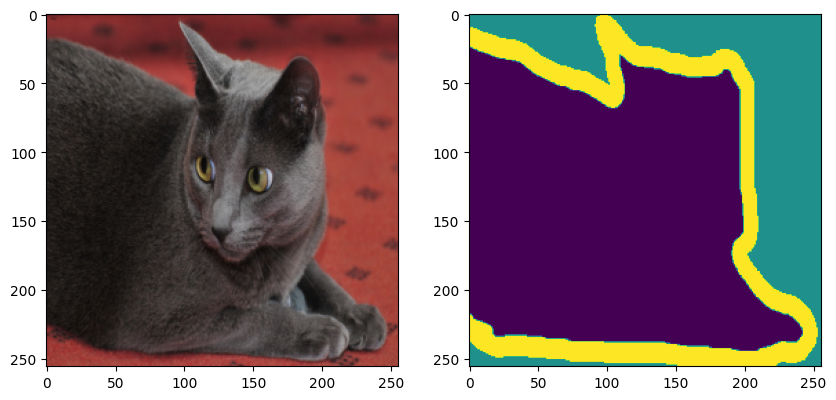

In [26]:
image, mask = next(iter(dl))

fig, (left, right) = plt.subplots(1, 2, figsize = (10, 10))
left.imshow(image[0].permute(1, 2, 0));
right.imshow(mask[0].squeeze());

In [22]:
fcn = fcn_resnet50(
    weights = None,
    num_classes = 1,
    weights_backbone = ResNet50_Weights.DEFAULT
)

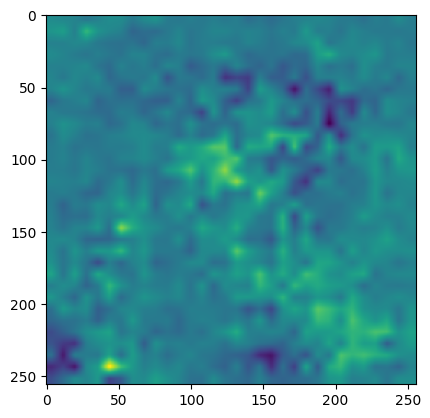

In [27]:
plt.imshow(fcn(image[0].unsqueeze(0))["out"].detach().cpu().squeeze());